### Загружаем нужные библиотеки:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sn
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

### Загружаем обновленный датасет:

In [2]:
data = pd.read_csv("BankCustomerData_updated.csv")

In [3]:
print(data[['term_deposit']])

       term_deposit
0               0.0
1               0.0
2               0.0
3               0.0
4               0.0
...             ...
42206           1.0
42207           1.0
42208           0.0
42209           1.0
42210           0.0

[42211 rows x 1 columns]


In [4]:
data.describe()

,Unnamed: 0,age,default,balance,housing,loan,day,duration,campaign,pdays,...,jun,mar,may,nov,oct,sep,failure,other,success,unknown
count,42211.000000,42211.000000,42211.000000,42211.000000,42211.000000,42211.000000,42211.000000,42211.000000,42211.000000,42211.000000,...,42211.000000,42211.000000,42211.000000,42211.000000,42211.000000,42211.000000,42211.000000,42211.000000,42211.000000,42211.000000
mean,21323.068158,0.295544,0.017720,0.110740,0.576366,0.165407,0.494833,0.052079,0.029292,0.065688,...,0.119969,0.006088,0.317595,0.090664,0.012082,0.006610,0.100448,0.035678,0.018076,0.845798
std,12313.621881,0.132395,0.131935,0.113933,0.494140,0.371552,0.276437,0.052590,0.051036,0.171561,...,0.324929,0.077792,0.465546,0.287133,0.109254,0.081032,0.300600,0.185488,0.133227,0.361146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10667.500000,0.194805,0.000000,0.050019,0.000000,0.000000,0.233333,0.020537,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,21326.000000,0.272727,0.000000,0.069293,1.000000,0.000000,0.500000,0.035990,0.016129,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,31994.500000,0.389610,0.000000,0.118940,1.000000,0.000000,0.666667,0.064050,0.032258,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,42638.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Разбиение датасета на обучающую и тестовую выборки

In [5]:
X = data.drop(['term_deposit','duration'], axis=1)
y = data['term_deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
N_test, _ = X_test.shape

## Обучение классификатора

Возьмем один скрытый слой со 100 нейронами

In [6]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          max_iter=2000,
                          random_state = 42)


In [7]:
%%time
mlp_model.fit(X_train, y_train)

Wall time: 1min 34s


MLPClassifier(activation='logistic', max_iter=2000, random_state=42,
              solver='lbfgs')

Ошибки на обучающей и тестовой выборках:

In [8]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.09270958367553225 0.09381218610821568


Ошибка составила 9.38%, наблюдается переобучение.

# Подбор гиперпараметров

## Подбор оптимальное значение параметра регуляризации `alpha`

In [9]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha,
                              hidden_layer_sizes = (100,), 
                              solver = 'lbfgs',
                              activation = 'logistic',
                              max_iter=2000, 
                              random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

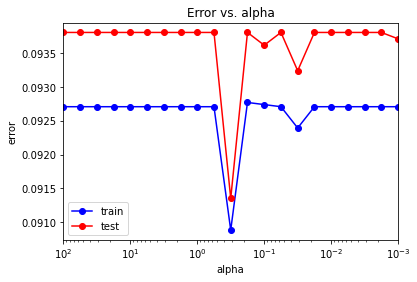

In [49]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Рассмотрим как менялась метрика в зависимости от гиперпараметра:

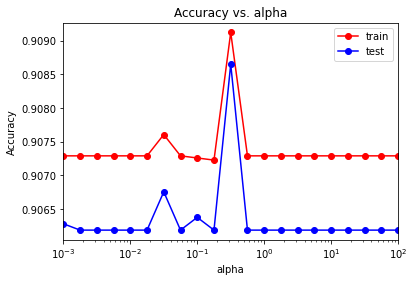

In [11]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

Минимальное значение ошибки:

In [12]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0908775033166972 0.09134843172557566


Оптимальное значение `alpha`:

In [13]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.31622777]


In [14]:
alpha_opt = alpha_opt[0]
alpha_opt

0.31622776601683794

Повторим обучение при найденном оптимальном значении `alpha`:

In [15]:
mlp_model = MLPClassifier(alpha = alpha_opt,
                          hidden_layer_sizes = (100,), 
                          solver = 'lbfgs',
                          activation = 'logistic', 
                          max_iter=2000, 
                          random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0908775033166972
0.09134843172557566


Значение ошибки улучшилось с 9.38% до 9.13%

## Подбор оптимального числа нейронов

Теперь определим оптимальное число нейронов при одном скрытом слое.

In [18]:
import time
from sklearn.neural_network import MLPClassifier
neurons_arr = [
    (10,), (20,), (50,), (100,), (200,),
    (10, 10), (20, 10), (100, 10),
    (10, 10, 5), (20, 10, 5), (100, 10, 10)
]
test_err = []
train_err = []
train_acc = []
test_acc = []

for neurons in neurons_arr:
    start = time.time()
    mlp_model = MLPClassifier(alpha = alpha_opt,
                              hidden_layer_sizes = neurons, 
                              solver = 'lbfgs',
                              activation = 'logistic',
                              max_iter=2000,
                              random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

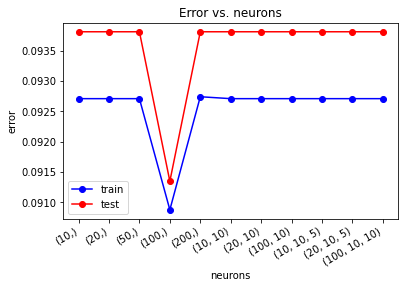

In [21]:
x_neuron = list(range(len(neurons_arr)))
plt.plot(x_neuron, train_err, 'b-o', label = 'train')
plt.plot(x_neuron, test_err, 'r-o', label = 'test')
plt.xticks(x_neuron, [str(i) for i in neurons_arr])
plt.gcf().autofmt_xdate()
plt.title('Error vs. neurons')
plt.xlabel('neurons')
plt.ylabel('error')
plt.legend()
pass

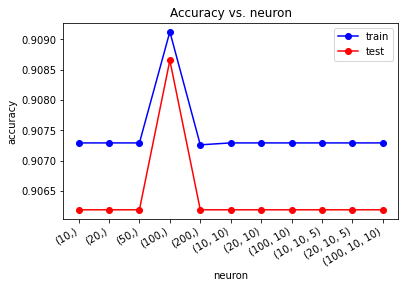

In [22]:
x_neuron = list(range(len(neurons_arr)))
plt.plot(x_neuron, train_acc, 'b-o', label = 'train')
plt.plot(x_neuron, test_acc, 'r-o', label = 'test')
plt.xticks(x_neuron, [str(i) for i in neurons_arr])
plt.gcf().autofmt_xdate()
plt.title('Accuracy vs. neuron')
plt.xlabel('neuron')
plt.ylabel('accuracy')
plt.legend()
pass

In [24]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0908775033166972 0.09134843172557566


In [25]:
print(test_err)
print(min_test_err)
idx=-1
for i in range(0, len(test_err)-1):
    if min_test_err == test_err[i]:
        idx = i
        break
neurons_opt = neurons_arr[idx]
print(neurons_opt)

[0.09381218610821568, 0.09381218610821568, 0.09381218610821568, 0.09134843172557566, 0.09381218610821568, 0.09381218610821568, 0.09381218610821568, 0.09381218610821568, 0.09381218610821568, 0.09381218610821568, 0.09381218610821568]
0.09134843172557566
(100,)


Видно что наименьшая ошибка на тестовой выборке равна 0.091348. И она наблюдается, когда есть один скрытый слой со 100 нейронами

In [26]:
mlp_model = MLPClassifier(alpha = alpha_opt,
                          hidden_layer_sizes = neurons_opt, 
                          solver = 'lbfgs',
                          activation = 'logistic',
                          max_iter=2000,
                          random_state = 42)
mlp_model.fit(X_train, y_train)


y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0908775033166972
0.09134843172557566


Найдем также оптимальное значение alpha при заданном числе нейронов.

In [33]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha,
                              hidden_layer_sizes = neurons_opt, 
                              solver = 'lbfgs',
                              activation = 'logistic',
                              max_iter=2000,
                              random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

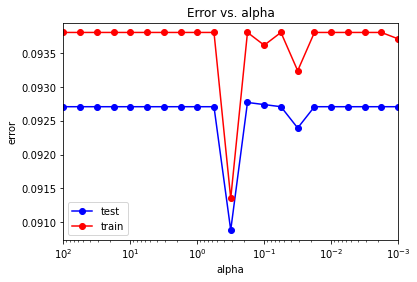

In [35]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [36]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0908775033166972 0.09134843172557566


In [37]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.31622777]


## Обучение с оптимальными параметрами

In [38]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,),
                          alpha=alpha_opt,
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          max_iter=2000,
                          random_state = 42,)

In [39]:
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=array([0.31622777]), max_iter=2000,
              random_state=42, solver='lbfgs')

Ошибки на тестовой выборке:

In [40]:
y_test_predict = mlp_model.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.09134843172557566

Ошибки на тренировочной выборке:

In [41]:
y_train_predict = mlp_model.predict(X_train)
err_train  = np.mean(y_train  != y_train_predict)
err_train

0.0908775033166972

In [42]:
1-err_test, 1-err_train

(0.9086515682744243, 0.9091224966833028)

In [47]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_predict, y_test))

[[9545  946]
 [  18   44]]


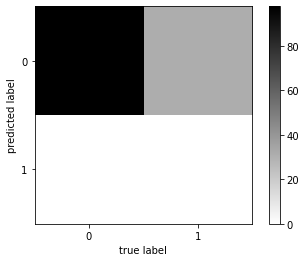

In [48]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

## Выводы

В данной лабораторной работе найдены оптимальные параметры по точности и времени обучения - 1 слой с 100 нейронами. При различных значенях нейронов получали малое изменение точности, следовательно, никакой явной зависимости точности от этих параметров, т.е. можно сказать, что коэффициенты почти не влияют на точность. 